# Turn your conditional loops to Numpy vectors

Vectorization trick is fairly well-known to data scientists and is used routinely in coding, to speed up the overall data transformation, where simple mathematical transformatios are performed over an iterable object e.g. a list. 

What is under-appreciated and overlooked is that it even pays to vectorize non-trivial code blocks such as conditional loops.

The very first question every data scientist encountered is "Python vs. R vs Julia". I chose Python without any question, because unlike R or Julia, it is a general purpose language and not have a functional syntax to start with right out of the box. So, it needs specialized library.

**Numpy**, short for [Numerical Python](http://www.numpy.org/), is the fundamental package requred for high performance scientific computing and data analysis in Python ecosystem. It is the foundation of which nearly all of the higher-level tools such as Pandas and scikit-learn are built. TensorFlow uses Numpy arrays as the fundamental building block on top of which they built their Tensor objects and graphflow for deep learning tasks (which makes heavy use of linear algebra operations on a long list/vector/matrix of numbers).

Many Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. The speed boost depends on which operations you're performing. For data science and modern machine learning tasks, this is an invaluable advantage.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin

In [2]:
plt.style.use(['dark_background'])

In [3]:
# Number of test points
N = 5000

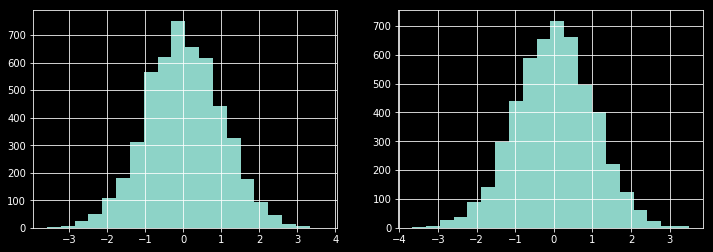

In [4]:
# List of stored elements, generated from a Normal distribution
lst_x = np.random.randn(N)
lst_y = np.random.randn(N)
lst_result = []

# Plots the data
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].hist(lst_x,bins=20); axs[0].grid()
axs[1].hist(lst_y,bins=20); axs[1].grid()

In [5]:
from collections import defaultdict
from IPython.core.magics.execution import TimeitResult
results = defaultdict(TimeitResult)

In [6]:
# Define a custom function with some if-else loops
def myfunc(x,y): 
    if (x>0.5*y and y<0.3): return (sin(x-y)) 
    elif (x<0.5*y): return 0 
    elif (x>0.2*y): return (2*sin(x+2*y)) 
    else: return (sin(y+x))

In [7]:
# Vanilla for-loop
#%timeit -o for x,y in zip(lst_x, lst_y): lst_result.append(myfunc(x,y))
# To make it less pythonic
%timeit -o for i in range(N): lst_result.append(myfunc(lst_x[i],lst_y[i]))

3.78 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 3.78 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [8]:
results['vanilla'] = _

In [9]:
# List comprehension
%timeit -o lst_result = [myfunc(x,y) for x,y in zip(lst_x,lst_y)]

2.69 ms ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 2.69 ms ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [10]:
results['list'] = _

In [11]:
# Map() function
%timeit -o list(map(myfunc,lst_x,lst_y))

2.38 ms ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 2.38 ms ± 28.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [12]:
results['map'] = _

In [13]:
# Numpy.vectorize method
vectfunc = np.vectorize(myfunc,otypes=[np.float],cache=False)
%timeit -o list(vectfunc(lst_x,lst_y))

1.76 ms ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 1.76 ms ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [14]:
results['vec'] = _

Notice that I have used **%timeit** [jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) and done a trick to [store the result from cell magic](https://stackoverflow.com/questions/41351041/how-to-store-the-result-from-timeit-cell-magic) as a python global variable. By magic command, I am effectively running iterations of the same expression and averaging the execution time to avoid any random effect. By the trick, I am able to reuse the result for further visualizing and analyzing.

We see the evidence that, for this data transformation task based on a series of conditional checks, the vectorization approach using numpy routinely gives some 20-50% speed-up compared to general Python methods.

> It may not seem a dramatic improvement, but every bit of time saving adds up in a data science pipeline and pays back in the long run.

In short, wherever you have a long list of data and need to perform some mathematical transformation over them, strongly consider tuning those python data structures (list or tuples or dictionaries) into `np.ndarray` objects and using inherent vectorization capabilites.

[Numpy provides a C-API](https://docs.scipy.org/doc/numpy-1.13.0/reference/c-api.html) for even faster code execution but it takes away the simplicity of Pythonicism. This Scipy Lecture note shows all the related options you have in this regard.

There is an entire open-source, online book on this topic by a French neuroscience researcher. [Check here](https://www.labri.fr/perso/nrougier/from-python-to-numpy/#id7).

In [15]:
mean = [o.average*1e6 for o in results.values()]
stdv = [o.stdev*1e6 for o in results.values()]

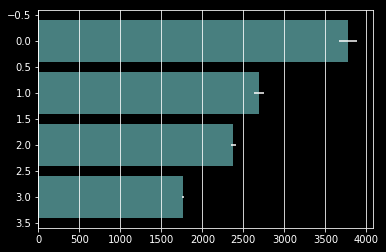

In [16]:
plt.barh(range(len(results)), mean, xerr=stdv, color='#487F7F', ecolor='white')
plt.grid(axis='x')
plt.gca().invert_yaxis()